# Exercise 1

## Import packages

In [1]:
import skimage.io
import skimage.color
import skimage.exposure
import numpy as np
import matplotlib.pyplot as plt

## Task 1

Implementation of some basic vector and matrix calculations using NumPy.

Reference: https://numpy.org/doc/1.18/reference/index.html

Create the following vectors and matrix using numpy. They should use floating point as data type.
$$
a = \begin{bmatrix}
1 & 0 & 1 & 0 & 1
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
1 & 2 & 3 & 4 & 5
\end{bmatrix}
$$

$$
M =\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{bmatrix}
$$

Also define the following scalar value
$$k = 5.0$$

In [ ]:
a = np.array([1, 0, 1, 0, 1], dtype=float)
b = np.array([1, 2, 3, 4, 5], dtype=float)
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=float)
k = 5.0


print(f'a = {a}')
print(f'b = {b}')
print(f'M = {M}')
print(f'k = {k}')

a = [1. 0. 1. 0. 1.]
b = [1. 2. 3. 4. 5.]
M = [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
k = 5.0


In [14]:
# TODO: Add vector a with vector b
add = a+b
np.testing.assert_allclose(add, np.array([2, 2, 4, 4, 6]))
print(f'a + b = {add}')



# TODO: Multiply vector a with scalar value k
mult = k * a
np.testing.assert_allclose(mult, np.array([5, 0, 5, 0, 5]))
print(f'k * a = {mult}')

# TODO: Dot product between a and b
dot = np.dot(a,b)
np.testing.assert_allclose(dot, 9.0)
print(f'<a, b> = {dot}')

# TODO: Create vector c by sclicing vector a in order to get [0, 1, 0]
c = a[1:4]
np.testing.assert_allclose(c, [0, 1, 0])
print(f'c = {c}')

# TODO: Multiply vector c with matrix M
cM_mult = M * c.reshape(1, -1)  # Element-wise multiplication with broadcasting
np.testing.assert_allclose(cM_mult, [[0, 2, 0], [0, 5, 0], [0, 8, 0]])
print(f'c * M = {cM_mult}')

# TODO: Dot product between vector and matrix M
cM_dot = np.dot(c,M)
np.testing.assert_allclose(cM_dot, [4, 5, 6])
print(f'<c, M> = {cM_dot}')

# TODO: Use a numpy-herlper function to create a vector d = [0, 1, 2 ..., 99]
d = np.arange(100)

# TODO: Now use slicing with strides to reduce this vector to d_small = [40, 50, 60]
d_small = d[40:61:10]
np.testing.assert_allclose(d_small, [40, 50, 60])

print(f'd_small = {d_small}')

a + b = [2. 2. 4. 4. 6.]
k * a = [5. 0. 5. 0. 5.]
<a, b> = 9.0
c = [0. 1. 0.]
c * M = [[0. 2. 0.]
 [0. 5. 0.]
 [0. 8. 0.]]
<c, M> = [4. 5. 6.]
d_small = [40 50 60]


## Task 2

1. Load the image in ```./data/pepo.jpg``` from your disk and store it in a variable named ```image``` (use ```skimage.io```).
2. Store and print the shape of the image and the value range (min and max values).
3. Convert it to gray scale and save it in a variable named ```image_gray``` (use ```skimage.color```).
4. Store and print the shape of the grayscale image and the value range (min and max values).
5. Save the grayscale image back to disk in ```./data/pepo_gray.jpg``` (use ```skimage.io```).
6. Use Matplotlib to show the RGB and the grayscale image side by side.

Reference: https://scikit-image.org/docs/stable/index.html  
Reference: https://matplotlib.org/users/index.html  

In [16]:
# TODO: 1. Load the image in ./data/pepo.jpg from your disk and store it in a variable named image
image = skimage.io.imread('./data/pepo.jpg')

# TODO: 2. Store and print the shape of the image and the value range (min and max values)
rgb_image_shape = image.shape
rgb_min = image.min()
rgb_max = image.max()

print(f'RGB image shape: {rgb_image_shape}')
print(f'RGB image min: {rgb_min}')
print(f'RGB image max: {rgb_max}')

# TODO: 3. Convert it to gray scale and save it in a variable named image_gray
image_gray = skimage.color.rgb2gray(image)

# TODO: 4. Store and print the shape of the grayscale image and the value range (min and max values)
grayscale_image_shape = image_gray.shape
grayscale_min = image_gray.min()
grayscale_max = image_gray.max()

print(f'Grayscale image shape: {grayscale_image_shape}')
print(f'Grayscale image min: {grayscale_min}')
print(f'Grayscale image max: {grayscale_max}')

# TODO: 5. Save the grayscale image back to disk in ./data/pepo_gray.jpg
skimage.io.imsave('./data/pepo_gray.jpg', skimage.img_as_ubyte(image_gray))


RGB image shape: (512, 512, 3)
RGB image min: 0
RGB image max: 255
Grayscale image shape: (512, 512)
Grayscale image min: 0.0008333333333333333
Grayscale image max: 1.0


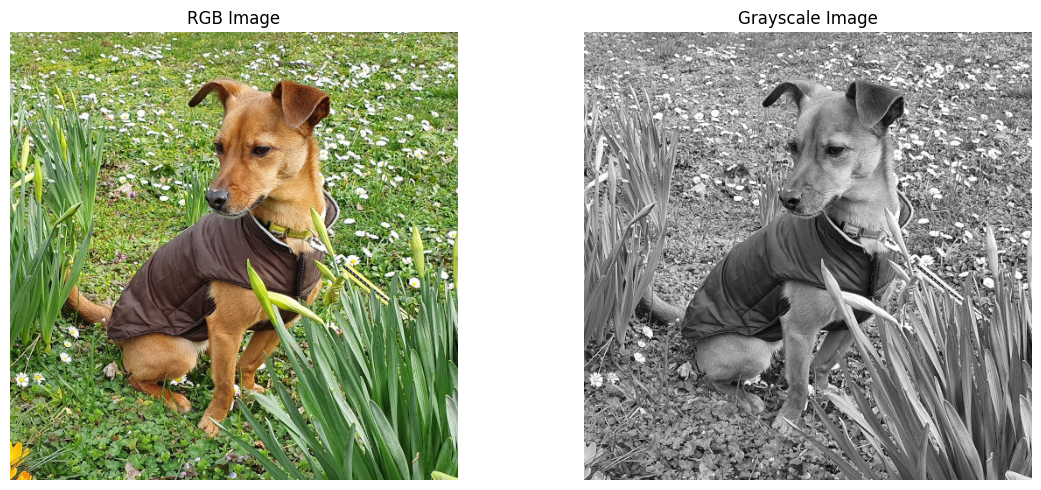

In [17]:
# TODO: 6. Use Matplotlib to show the RGB and the grayscale image side by side.
# Make sure that the gray image is displayed in gray.

plt.figure(figsize=(12, 5))

# Display RGB image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('RGB Image')
plt.axis('off')

# Display Grayscale image
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()


## Task 3

Plot the color histogram of the rgb image.

Reference: https://matplotlib.org/users/index.html

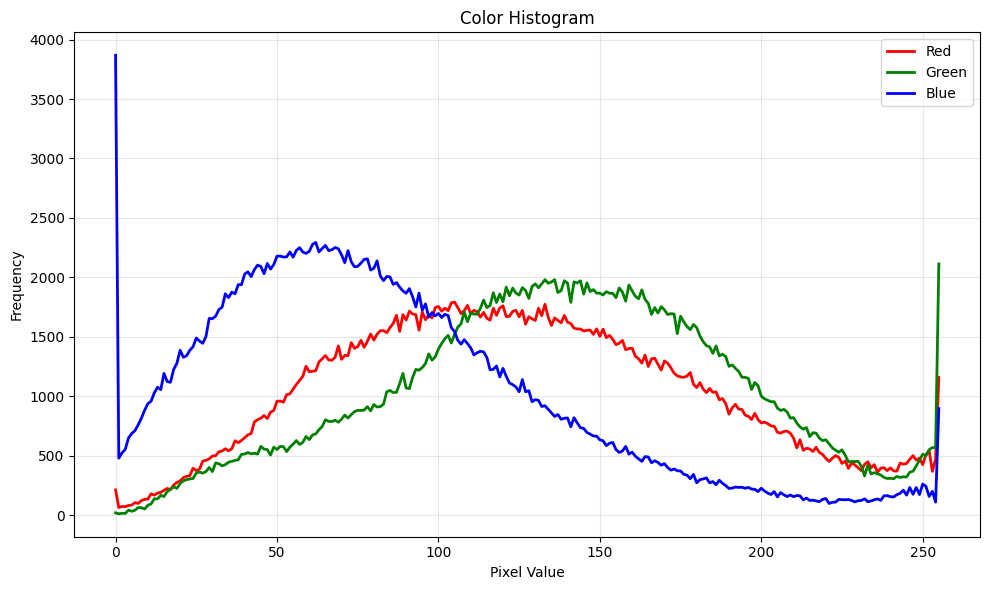

In [18]:
def plot_color_histogram(image):
    '''
    Plot the histogram of each color channel into a single plot.
    Take a look at the scikit-image submodule skimage.exposure

    image -- RGB image
    '''
    # Create a figure
    plt.figure(figsize=(10, 6))
    
    # Define colors for each channel
    colors = ('r', 'g', 'b')
    channel_names = ('Red', 'Green', 'Blue')
    
    # For each channel
    for i, color in enumerate(colors):
        # Calculate histogram
        hist, bin_centers = skimage.exposure.histogram(image[:, :, i])
        
        # Plot the histogram
        plt.plot(bin_centers, hist, color=color, lw=2, label=channel_names[i])
    
    plt.title('Color Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
plot_color_histogram(image)

## Task 4

Convert the RGB image into the HSV color space. Rotate the colors in the HSV color space, convert it back to the RGB color space and plot it together with its histogram. For this task, you are only allowed to use NumPy.

More information about the HSV color space: https://en.wikipedia.org/wiki/HSL_and_HSV

In [19]:
def rgb2hsv(image):
    '''
    Convert the rgb image into hsv color space and return it.

    image -- rgb image
    '''
    # Normalize RGB values to range [0, 1]
    rgb = image.astype(np.float32) / 255.0
    
    # Extract RGB channels
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    
    # Calculate value (V)
    v = np.max(rgb, axis=2)
    
    # Calculate saturation (S)
    min_val = np.min(rgb, axis=2)
    delta = v - min_val
    
    s = np.zeros_like(v)
    non_zero_indices = v > 0
    s[non_zero_indices] = delta[non_zero_indices] / v[non_zero_indices]
    
    # Calculate hue (H)
    h = np.zeros_like(v)
    
    # When delta is 0, hue is 0
    non_zero_delta = delta > 0
    
    # Red is max
    red_max = (v == r) & non_zero_delta
    h[red_max] = ((g[red_max] - b[red_max]) / delta[red_max]) % 6
    
    # Green is max
    green_max = (v == g) & non_zero_delta
    h[green_max] = (2.0 + (b[green_max] - r[green_max]) / delta[green_max])
    
    # Blue is max
    blue_max = (v == b) & non_zero_delta
    h[blue_max] = (4.0 + (r[blue_max] - g[blue_max]) / delta[blue_max])
    
    # Convert hue to [0, 1] range
    h = h / 6.0
    
    # Stack channels to create HSV image
    hsv = np.stack((h, s, v), axis=2)
    
    return hsv

def hsv2rgb(image):
    '''
    Convert the hsv image into rgb color space and return it.

    image -- hsv image
    '''
    h, s, v = image[:,:,0], image[:,:,1], image[:,:,2]
    
    # Handle hue wrap-around
    h = h % 1.0
    
    h_6 = h * 6.0
    i = np.floor(h_6)
    f = h_6 - i
    
    p = v * (1 - s)
    q = v * (1 - f * s)
    t = v * (1 - (1 - f) * s)
    
    i = i.astype(np.int32) % 6
    
    # Create RGB array with correct shape
    rgb = np.zeros_like(image)
    
    # Apply the conversion formulas based on hue sector
    mask = i == 0
    rgb[mask, 0], rgb[mask, 1], rgb[mask, 2] = v[mask], t[mask], p[mask]
    
    mask = i == 1
    rgb[mask, 0], rgb[mask, 1], rgb[mask, 2] = q[mask], v[mask], p[mask]
    
    mask = i == 2
    rgb[mask, 0], rgb[mask, 1], rgb[mask, 2] = p[mask], v[mask], t[mask]
    
    mask = i == 3
    rgb[mask, 0], rgb[mask, 1], rgb[mask, 2] = p[mask], q[mask], v[mask]
    
    mask = i == 4
    rgb[mask, 0], rgb[mask, 1], rgb[mask, 2] = t[mask], p[mask], v[mask]
    
    mask = i == 5
    rgb[mask, 0], rgb[mask, 1], rgb[mask, 2] = v[mask], p[mask], q[mask]
    
    # Convert back to uint8 range
    rgb = (rgb * 255.0).clip(0, 255).astype(np.uint8)
    
    return rgb

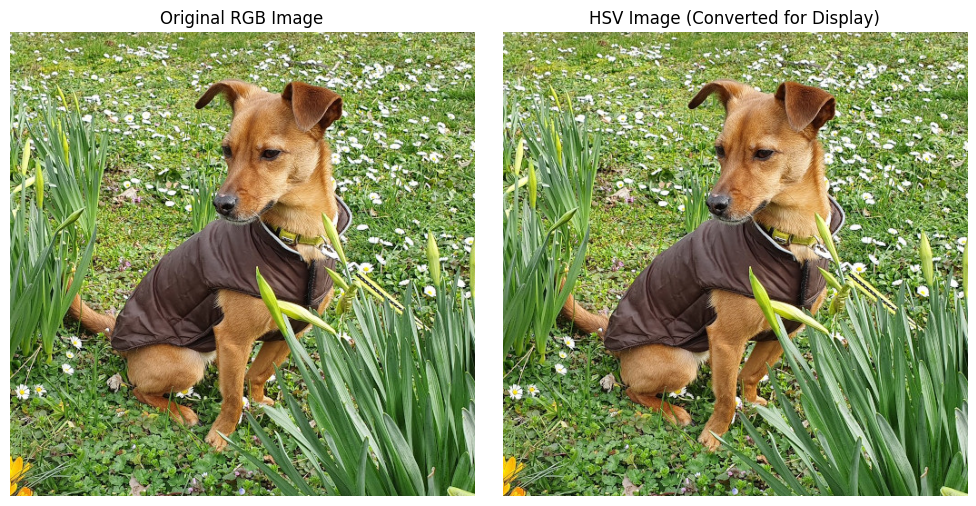

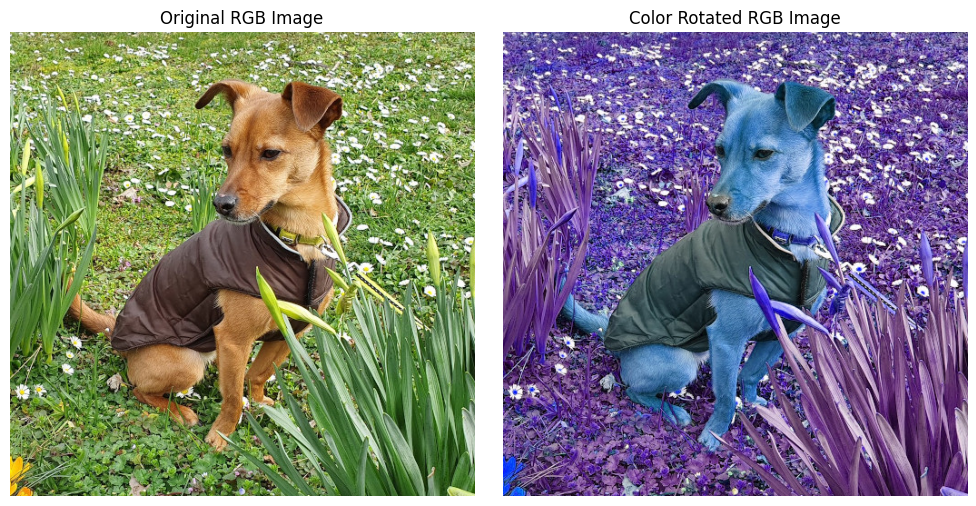

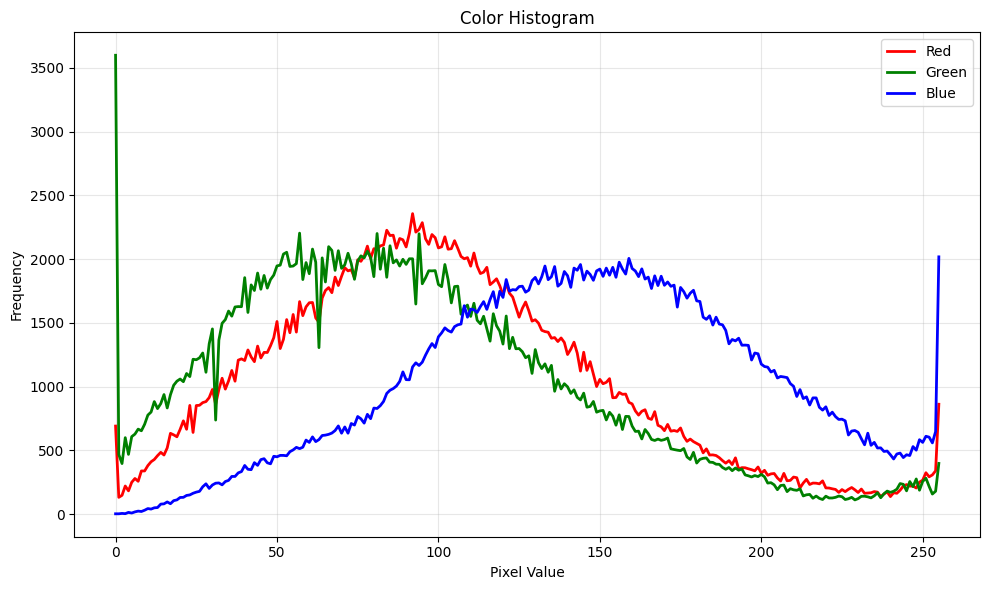

In [20]:
# Change the color space from rgb to hsv and plot it
image_hsv = rgb2hsv(image)

# Plot the HSV image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)  # Original RGB image
plt.title('Original RGB Image')
plt.axis('off')

# HSV needs special handling for display
plt.subplot(1, 2, 2)
# Display HSV by mapping hue to RGB color circle and using value as brightness
hsv_display = np.copy(image_hsv)
plt.imshow(hsv2rgb(hsv_display))
plt.title('HSV Image (Converted for Display)')
plt.axis('off')
plt.tight_layout()
plt.show()

# Rotate the colors in hsv color space
# Shift the hue channel by 0.5 (180 degrees) to create color inversion
rotated_hsv = np.copy(image_hsv)
rotated_hsv[:, :, 0] = (rotated_hsv[:, :, 0] + 0.5) % 1.0  # Rotate hue by 180 degrees

# Convert it back from HSV to RGB and plot it
rotated_rgb = hsv2rgb(rotated_hsv)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_rgb)
plt.title('Color Rotated RGB Image')
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot the color histogram of the inverted rgb image
plot_color_histogram(rotated_rgb)
